# PCA from scratch

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Generate synthetic 2D data (correlated data)
np.random.seed(42)
X = np.random.multivariate_normal(mean=[0, 0], cov=[[3, 2], [2, 2]], size=100)

In [4]:
X.shape

(100, 2)

In [5]:
# Compute the covariance matrix
cov_matrix = np.cov(X, rowvar=False)
cov_matrix

array([[2.28165958, 1.40082016],
       [1.40082016, 1.50064765]])

In [6]:
# Compute eigenvalues and eigenvectors of the covariance matrix
eig_values, eig_vectors = np.linalg.eig(cov_matrix)
eig_values, eig_vectors

(array([3.34538606, 0.43692116]),
 array([[ 0.79640776, -0.60476002],
        [ 0.60476002,  0.79640776]]))

In [7]:
# Sort eigenvectors by eigenvalues (descending order)
sorted_indices = np.argsort(eig_values)[::-1]
eig_vectors = eig_vectors[:, sorted_indices]
eig_values = eig_values[sorted_indices]

# Project data onto the first principal component
pc1 = eig_vectors[:, 0]
X_pc1 = X @ pc1

In [8]:
pc1, X_pc1, X_pc1.shape

(array([0.79640776, 0.60476002]),
 array([-1.05954506, -1.39675261,  0.50213899, -3.37937673,  0.99777318,
         0.99381432, -0.49969938,  3.68871615,  2.16019074,  1.95173591,
        -3.12800942, -0.13152928,  1.1615888 ,  2.45470154,  1.28531233,
         1.26850746,  0.03824016, -1.74574768, -0.42860134,  2.83470333,
        -1.57858454,  0.24965728,  3.16391915,  0.97432336, -0.718132  ,
        -0.68868127,  1.44018017, -2.21007854,  1.79497394, -0.71612585,
         1.02497061,  2.37332225, -1.74729209,  0.14485043, -0.76656208,
        -0.78548297,  0.06258123,  5.58737493, -0.18323477, -0.17826983,
         0.46594926, -3.1515565 ,  1.73107438, -1.95784664,  1.1267795 ,
        -0.21594029,  1.50221172,  0.85040888, -0.63471427, -0.00883195,
         3.02639077,  0.73903821,  0.3408427 , -4.02966664, -0.54935834,
         4.09793733, -0.15055444,  0.40811906,  0.08453348, -2.44729028,
        -1.68122159, -2.98330896, -1.27278321,  2.12041684, -0.20833217,
         3.310965

In [9]:
pc2 = eig_vectors[:, 1]
X_pc2 = X @ pc2

In [10]:
pc2

array([-0.60476002,  0.79640776])

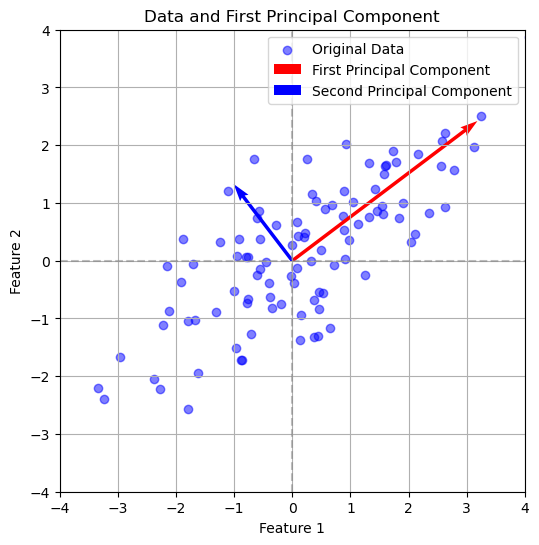

PC1
Eigenvector: [0.79640776 0.60476002]
Eigenvalue: 3.345386064579159

PC2
Eigenvector: [-0.60476002  0.79640776]
Eigenvalue: 0.43692116053072816


In [11]:

# Plot original data and principal component
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], alpha=0.5, label="Original Data", color='blue')
plt.quiver(0, 0, pc1[0], pc1[1], color='red', scale=0.25, label="First Principal Component", angles='xy', scale_units='xy')
plt.quiver(0, 0, pc2[0], pc2[1], color='blue', scale=0.6, label="Second Principal Component", angles='xy', scale_units='xy')

plt.axhline(0, color='gray', linestyle='--', alpha=0.5)
plt.axvline(0, color='gray', linestyle='--', alpha=0.5)
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Data and First Principal Component")
plt.legend()
plt.grid()
plt.show()

# Show eigenvalues (variance along each principal component)
print("PC1")
print(f"Eigenvector: {eig_vectors[:, 0]}\nEigenvalue: {eig_values[0]}\n")

print("PC2")
print(f"Eigenvector: {eig_vectors[:, 1]}\nEigenvalue: {eig_values[1]}")


## Eigendecomposition of the Covariance Matrix

$$
\Sigma = V \Lambda V^T
$$

where:

- **$ \Sigma $** is the **covariance matrix** (a $ d \times d $ symmetric matrix).
- **$ V $** is a **matrix of eigenvectors** (each column is an eigenvector).
- **$ \Lambda $** is a **diagonal matrix of eigenvalues** (each eigenvalue represents the variance along its corresponding eigenvector).
- **$ V^T $** is the **transpose of $ V $** (since eigenvectors are orthonormal, $ V $ is an orthogonal matrix: $ V^T V = I $).


In [12]:
# Generate a simple 2D dataset with a known covariance structure
np.random.seed(42)
X = np.random.randn(100, 2) @ np.array([[2, 1], [1, 2]])  # Correlated data

# Compute the covariance matrix
cov_matrix = np.cov(X, rowvar=False)

# Compute eigenvalues and eigenvectors
eig_values, eig_vectors = np.linalg.eig(cov_matrix)

# Construct the diagonal eigenvalue matrix
Lambda = np.diag(eig_values)

# Display matrices
import pandas as pd
cov_df = pd.DataFrame(cov_matrix, columns=["Feature 1", "Feature 2"], index=["Feature 1", "Feature 2"])
eig_vec_df = pd.DataFrame(eig_vectors, columns=["PC1", "PC2"], index=["Feature 1", "Feature 2"])
lambda_df = pd.DataFrame(Lambda, columns=["PC1", "PC2"], index=["PC1", "PC2"])

print("Covariance matrix")
display(cov_df)

print("\nEigen vectors matrix")
display(eig_vec_df)

print("\nEigenvalue matrix")
display(lambda_df)


Covariance matrix


,Feature 1,Feature 2
Feature 1,4.041393,3.600212
Feature 2,3.600212,4.834731



Eigen vectors matrix


,PC1,PC2
Feature 1,-0.744821,-0.667264
Feature 2,0.667264,-0.744821



Eigenvalue matrix


,PC1,PC2
PC1,0.816063,0.000000
PC2,0.000000,8.060061


In [16]:
eig_vectors

array([[-0.744821  , -0.66726433],
       [ 0.66726433, -0.744821  ]])

# Loadings (Eigenvectors)

https://online.stat.psu.edu/stat505/lesson/11/11.2

In PCA, given a mean-centered dataset $X$ with $n$ samples and $p$ variables, the first principal component $PC_1$ is given by the linear combination of the original variables $X_1, X_2, \dots, X_p$:

$$
PC_1 = w_{11}X_1 + w_{12}X_2 + \dots + w_{1p}X_p
$$

The first principal component $PC_1$ represents the component that retains the maximum variance of the data. **$\mathbf{w}_1$** corresponds to an **eigenvector** of the covariance matrix:

$$
\Sigma = \frac{1}{N - 1} X^T X
$$

The elements of the eigenvector $\mathbf{w}_1$ are also known as **loadings**.

> *PCA loadings are the coefficients of the linear combination of the original variables from which the principal components (PCs) are constructed.*
